# NSGA-III

NSGA-III is a reference point-based evolutionary algorithm that extends the NSGA-II framework to handle multi-objective problems more effectively. In the context of 3-objective optimization, NSGA-III ensures a well-distributed approximation of the Pareto front by incorporating a set of pre-defined **reference points** to guide the selection process.

## Key Features

- **Non-Dominated Sorting:**  
  The algorithm classifies the population into different fronts based on Pareto dominance, identifying the non-dominated solutions.

- **Normalization:**  
  Objective values are normalized using the ideal and nadir points to account for differences in scale among objectives.

- **Reference Point Association:**  
  A set of uniformly distributed reference points in the normalized objective space is predefined. Each solution is associated with the reference point to which it has the smallest perpendicular distance, ensuring a uniform spread across the Pareto front.

- **Survival Selection:**  
  When the number of solutions exceeds the desired population size, NSGA-III selects individuals based on their perpendicular distance to the associated reference points, prioritizing those that contribute to both convergence and diversity.


### Reference Point Association

Let $\{\mathbf{r}^1, \mathbf{r}^2, \dots, \mathbf{r}^R\}$ be a set of uniformly distributed reference points in the normalized space, where each $\mathbf{r}^i \in \mathbb{R}^3$. The perpendicular distance from a solution $\mathbf{f}'(\mathbf{x})$ to a reference point $\mathbf{r}$ is calculated by:

$$
d_\perp\left(\mathbf{f}'(\mathbf{x}), \mathbf{r}\right) = \left\| \mathbf{f}'(\mathbf{x}) - \left( \frac{\mathbf{f}'(\mathbf{x}) \cdot \mathbf{r}}{\|\mathbf{r}\|^2} \right) \mathbf{r} \right\|.
$$

Each solution is associated with the reference point that minimizes this perpendicular distance, guiding the selection process toward a balanced distribution along the Pareto front.

Reference points play a crucial role in guiding the search process in both NSGA-III and RNSGA-II, yet they are used in distinct ways.


#### Reference Points in NSGA-III

- **Association Mechanism:**  
  In NSGA-III, a set of uniformly distributed reference points (or directions) is generated in the normalized objective space. Each solution is associated with the reference point to which it has the smallest perpendicular distance.

- **Niche Preservation:**  
  The environmental selection aims to fill as many niches as possible, ideally selecting one solution per reference point. This approach promotes a uniform spread of solutions along the Pareto front.

- **Population and Reference Points Relationship:**  
  Although it might seem that the number of reference points is analogous to the population size, in practice the number of reference points is determined by the desired granularity (for example, using a parameter such as the number of divisions per objective). Thus, the set of reference points may be smaller or larger than the population size; the key objective is to cover the objective space effectively.

#### Reference Points in RNSGA-II

- **Multiple Associations:**  
  In contrast to NSGA-III, RNSGA-II incorporates reference points during the survival selection phase as an additional criterion. Here, a single reference point can influence the evaluation of multiple solutions. That is, several solutions can be compared based on their proximity to the same reference point.

- **Selection Criteria:**  
  RNSGA-II ranks solutions not only by Pareto dominance and crowding distance but also by their closeness to the predefined reference points. This added metric helps steer the search toward regions of interest as specified by the decision-maker.

- **Focus and Diversity:**  
  While NSGA-III uses reference points primarily to preserve a balanced distribution across the Pareto front (ideally one solution per reference point), RNSGA-II uses them to both maintain diversity and focus the search on promising regions. This means that in RNSGA-II, the same reference point may guide the selection of multiple solutions if they are all near that region.

#### Comparison Summary

- **Mapping:**  
  - **NSGA-III:** Strives for a one-to-one association between solutions and reference points, leading to a well-spread Pareto front.
  - **RNSGA-II:** Allows multiple solutions to be associated with a single reference point, using proximity as an extra criterion to prioritize solutions.

- **Role in the Algorithm:**  
  - **NSGA-III:** Uses reference points to divide the objective space into niches, ensuring uniform coverage.
  - **RNSGA-II:** Integrates reference point proximity into the ranking mechanism alongside dominance and crowding, thus guiding the search toward specific areas of interest.

- **Population Relation:**  
  While NSGA-III's reference points are designed to cover the objective space and might appear analogous to the population size, their actual number is set by algorithm parameters rather than being inherently equal to the number of solutions. In RNSGA-II, no such one-to-one expectation exists; a reference point can be linked to multiple solutions as needed.

This nuanced difference highlights how NSGA-III and RNSGA-II employ reference points to balance convergence and diversity, each tailoring the mechanism to suit their specific selection strategies.




## DTLZ2 for 3 Objectives

To evaluate NSGA-III in a 3-objective scenario, the DTLZ2 problem is a popular benchmark due to its continuous and convex Pareto front.

### Decision Variables

Let the decision vector be $\mathbf{x} = (x_1, x_2, \dots, x_n)$ with each variable bounded by:

$$
x_i \in [0, 1], \quad i = 1, 2, \dots, n.
$$

For a 3-objective version, the number of decision variables is typically set as:

$$
n = 3 - 1 + k,
$$

where $k$ is the number of distance-related variables.

### Objective Functions

DTLZ2 defines an auxiliary function:

$$
g(\mathbf{x}) = \sum_{i=3}^{n} (x_i - 0.5)^2.
$$

The three objective functions are then given by:

$$
f_1(\mathbf{x}) = (1 + g(\mathbf{x})) \cdot \cos\left(\frac{\pi}{2} x_1\right) \cdot \cos\left(\frac{\pi}{2} x_2\right),
$$

$$
f_2(\mathbf{x}) = (1 + g(\mathbf{x})) \cdot \cos\left(\frac{\pi}{2} x_1\right) \cdot \sin\left(\frac{\pi}{2} x_2\right),
$$

$$
f_3(\mathbf{x}) = (1 + g(\mathbf{x})) \cdot \sin\left(\frac{\pi}{2} x_1\right).
$$

### Pareto Front Characteristics

When $g(\mathbf{x}) = 0$, the objective functions simplify to:

$$
f_1(\mathbf{x}) = \cos\left(\frac{\pi}{2} x_1\right) \cdot \cos\left(\frac{\pi}{2} x_2\right),
$$

$$
f_2(\mathbf{x}) = \cos\left(\frac{\pi}{2} x_1\right) \cdot \sin\left(\frac{\pi}{2} x_2\right),
$$

$$
f_3(\mathbf{x}) = \sin\left(\frac{\pi}{2} x_1\right).
$$

These solutions lie on the surface of a unit hypersphere in the objective space, defined by:

$$
f_1^2(\mathbf{x}) + f_2^2(\mathbf{x}) + f_3^2(\mathbf{x}) = 1.
$$

This continuous and convex Pareto front makes DTLZ2 an excellent test case to assess the balance between convergence and diversity in NSGA-III.


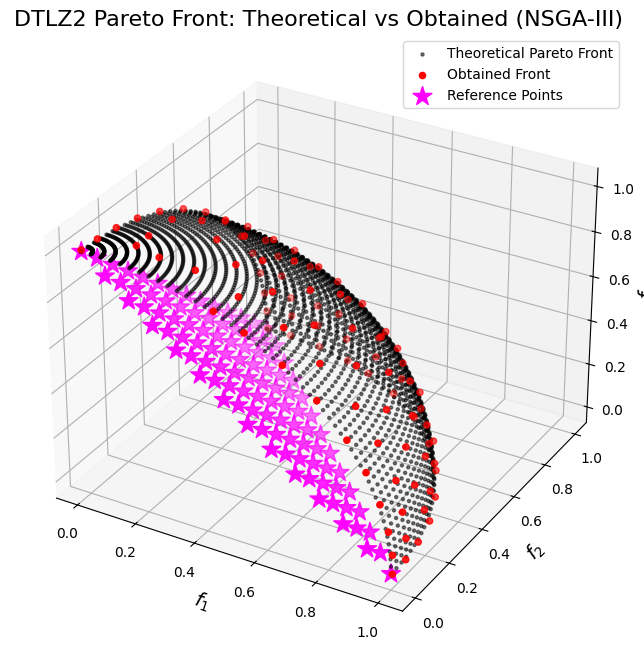

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pymoors import (
    Nsga3,
    DanAndDenisReferencePoints,
    RandomSamplingFloat,
    GaussianMutation,
    SimulatedBinaryCrossover,
    CloseDuplicatesCleaner,
)
from pymoors.schemas import Population
from pymoors.typing import TwoDArray

np.seterr(invalid="ignore")


def evaluate_dtlz2(x: TwoDArray) -> TwoDArray:
    """
    Evaluate the DTLZ2 objectives for a 3-objective problem.

    The decision vector x has num_vars components. For the Pareto front,
    the auxiliary function g(x) is minimized (g(x)=0) by setting the last
    num_vars-2 variables to 0.5.

    The objectives are computed as:
      f1(x) = (1+g) * cos((pi/2)*x1) * cos((pi/2)*x2)
      f2(x) = (1+g) * cos((pi/2)*x1) * sin((pi/2)*x2)
      f3(x) = (1+g) * sin((pi/2)*x1)
    """
    # Compute the auxiliary function g(x) using variables 3 to num_vars.
    g = np.sum((x[:, 2:] - 0.5) ** 2, axis=1)
    f1 = (1 + g) * np.cos((np.pi / 2) * x[:, 0]) * np.cos((np.pi / 2) * x[:, 1])
    f2 = (1 + g) * np.cos((np.pi / 2) * x[:, 0]) * np.sin((np.pi / 2) * x[:, 1])
    f3 = (1 + g) * np.sin((np.pi / 2) * x[:, 0])
    return np.column_stack((f1, f2, f3))


def dtlz2_theoretical_front(num_points=50):
    """
    Compute a set of points approximating the theoretical Pareto front for DTLZ2 (3 objectives).

    For the Pareto-optimal front, g(x) = 0, which implies that the decision variables
    x_3, ..., x_n are fixed at 0.5. Therefore, the front can be generated by varying x1 and x2:
      f1 = cos((pi/2)*x1) * cos((pi/2)*x2)
      f2 = cos((pi/2)*x1) * sin((pi/2)*x2)
      f3 = sin((pi/2)*x1)
    These points lie on a portion of the unit hypersphere in the positive orthant.
    """
    x1 = np.linspace(0, 1, num_points)
    x2 = np.linspace(0, 1, num_points)
    X1, X2 = np.meshgrid(x1, x2)
    X1_flat = X1.flatten()
    X2_flat = X2.flatten()

    f1 = np.cos((np.pi / 2) * X1_flat) * np.cos((np.pi / 2) * X2_flat)
    f2 = np.cos((np.pi / 2) * X1_flat) * np.sin((np.pi / 2) * X2_flat)
    f3 = np.sin((np.pi / 2) * X1_flat)
    return f1, f2, f3


# Create the reference points using DanAndDenisReferencePoints.
# This object generates reference points for NSGA-III.
ref_points = DanAndDenisReferencePoints(n_reference_points=100, n_objectives=3)

# Set up the NSGA-III algorithm for DTLZ2.
# For DTLZ2, a typical choice is num_vars = (number of objectives - 1) + k.
# Here, we choose k = 10, so num_vars = 2 + 10 = 12.
algorithm = Nsga3(
    sampler=RandomSamplingFloat(min=0, max=1),
    crossover=SimulatedBinaryCrossover(distribution_index=10),
    mutation=GaussianMutation(gene_mutation_rate=0.1, sigma=0.01),
    fitness=evaluate_dtlz2,
    num_objectives=3,
    num_constraints=0,
    duplicates_cleaner=CloseDuplicatesCleaner(epsilon=1e-8),
    num_vars=12,
    population_size=100,
    num_offsprings=100,
    num_iterations=350,
    mutation_rate=0.1,
    crossover_rate=0.9,
    keep_infeasible=False,
    upper_bound=1,
    lower_bound=0,
    reference_points=ref_points,
    verbose=False,
    seed=1729,
)

# Run the algorithm
algorithm.run()

# Get the best Pareto front obtained (as a Population instance)
best: Population = algorithm.population.best_as_population
obtained_fitness = best.fitness  # Shape: (num_solutions, 3)

# Compute the theoretical Pareto front for DTLZ2
f1_theo, f2_theo, f3_theo = dtlz2_theoretical_front(num_points=50)

# Plot the theoretical Pareto front, the obtained front, and the reference points in 3D.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the theoretical Pareto front as a scatter of many points.
ax.scatter(
    f1_theo,
    f2_theo,
    f3_theo,
    c="k",
    marker=".",
    label="Theoretical Pareto Front",
    alpha=0.5,
)

# Plot the obtained Pareto front from the algorithm.
ax.scatter(
    obtained_fitness[:, 0],
    obtained_fitness[:, 1],
    obtained_fitness[:, 2],
    c="r",
    marker="o",
    label="Obtained Front",
)

# Plot the reference points.
# Extract the reference points array from the DanAndDenisReferencePoints object.
ref_points_array = ref_points.generate()
ax.scatter(
    ref_points_array[:, 0],
    ref_points_array[:, 1],
    ref_points_array[:, 2],
    marker="*",
    s=200,
    color="magenta",
    label="Reference Points",
)

ax.set_xlabel("$f_1$", fontsize=14)
ax.set_ylabel("$f_2$", fontsize=14)
ax.set_zlabel("$f_3$", fontsize=14)
ax.set_title("DTLZ2 Pareto Front: Theoretical vs Obtained (NSGA-III)", fontsize=16)
ax.legend()
plt.show()

## Das and Dennis Procedure for Generating Reference Points

The Das and Dennis procedure is a systematic method for generating a uniformly distributed set of reference points on the unit simplex in the objective space. This technique is widely used in multi-objective optimization algorithms, such as NSGA-III, to guide the search process by ensuring balanced coverage of the Pareto front.

### Steps of the Procedure

1. **Define the Number of Objectives and Divisions:**  
   For a problem with $M$ objectives, choose a parameter $H$ (sometimes denoted as $p$) which represents the number of divisions along each axis of the objective space. This parameter \( H \) determines the granularity of the generated reference points.

2. **Generate Integer Combinations:**  
   Generate all combinations of non-negative integers $(a_1, a_2, \dots, a_M)$ that satisfy:
   $$
   a_1 + a_2 + \cdots + a_M = H.
   $$
   Each combination represents a unique way of partitioning the total number of divisions among the objectives.

3. **Map to the Simplex:**  
   Each integer combination is then mapped to a reference point on the unit simplex using:
   $$
   \mathbf{r} = \left(\frac{a_1}{H}, \frac{a_2}{H}, \dots, \frac{a_M}{H}\right).
   $$
   Since the components of $\mathbf{r}$ sum to 1, every point lies on the unit simplex, ensuring a uniform distribution across the objective space.

### Characteristics and Comparison

- **Uniformity:**  
  The procedure guarantees that the generated reference points are uniformly distributed over the simplex. This uniformity is critical for effectively exploring all regions of the Pareto front.

- **Relation to Population:**  
  In NSGA-III, each solution is associated with the nearest reference point based on a perpendicular distance metric. Although the number of reference points is not strictly equal to the population size, they are designed to cover the objective space in such a way that promotes diver
